In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train_path='C:/Users/dasha/Desktop/Study/Project/ImagesDataset/Advanced/training'
validation_path='C:/Users/dasha/Desktop/Study/Project/ImagesDataset/Advanced/validation'
test_path ='C:/Users/dasha/Desktop/Study/Project/ImagesDataset/Advanced/testing'

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [4]:
train_dataset=train.flow_from_directory(train_path,
                                        target_size=(300,300), 
                                        batch_size=(5), 
                                        class_mode='categorical')

validation_dataset=train.flow_from_directory(validation_path,
                                             target_size=(300,300),
                                             batch_size=(5),
                                             class_mode='categorical')

Found 150 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [5]:
train_dataset.class_indices

{'tree': 0, 'triangle': 1, 'warrior': 2}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                   tf.keras.layers.Flatten(),
                                  ##
                                   tf.keras.layers.Dense(512, activation='relu'),
                                  ##
                                   tf.keras.layers.Dense(3, activation='sigmoid')])

In [8]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'] ) 

In [9]:
model_fit=model.fit(train_dataset, steps_per_epoch=5, epochs=99, validation_data=validation_dataset)

Epoch 1/99
5/5 [==============================] - 3s 410ms/step - loss: 25.1002 - accuracy: 0.3200
Epoch 2/99
5/5 [==============================] - 2s 422ms/step - loss: 1.3570 - accuracy: 0.4400
Epoch 3/99
5/5 [==============================] - 2s 409ms/step - loss: 1.1637 - accuracy: 0.4800
Epoch 4/99
5/5 [==============================] - 2s 411ms/step - loss: 0.7437 - accuracy: 0.7200
Epoch 5/99
5/5 [==============================] - 2s 435ms/step - loss: 1.5162 - accuracy: 0.6800
Epoch 6/99
5/5 [==============================] - 2s 389ms/step - loss: 1.5916 - accuracy: 0.6800
Epoch 7/99
5/5 [==============================] - 2s 387ms/step - loss: 0.3814 - accuracy: 0.8800
Epoch 8/99
5/5 [==============================] - 2s 382ms/step - loss: 0.4856 - accuracy: 0.8800
Epoch 9/99
5/5 [==============================] - 2s 394ms/step - loss: 0.2668 - accuracy: 0.8800
Epoch 10/99
5/5 [==============================] - 2s 401ms/step - loss: 0.5097 - accuracy: 0.8800
Epoch 11/99
5/5 [=

5/5 [==============================] - 2s 395ms/step - loss: 2.5749e-07 - accuracy: 1.0000
Epoch 83/99
5/5 [==============================] - 2s 424ms/step - loss: 4.6730e-07 - accuracy: 1.0000
Epoch 84/99
5/5 [==============================] - 2s 410ms/step - loss: 3.1471e-07 - accuracy: 1.0000
Epoch 85/99
5/5 [==============================] - 2s 429ms/step - loss: 1.7166e-07 - accuracy: 1.0000
Epoch 86/99
5/5 [==============================] - 2s 418ms/step - loss: 1.7643e-07 - accuracy: 1.0000
Epoch 87/99
5/5 [==============================] - 2s 405ms/step - loss: 7.6294e-08 - accuracy: 1.0000
Epoch 88/99
5/5 [==============================] - 2s 400ms/step - loss: 1.5259e-07 - accuracy: 1.0000
Epoch 89/99
5/5 [==============================] - 2s 408ms/step - loss: 1.1921e-07 - accuracy: 1.0000
Epoch 90/99
5/5 [==============================] - 2s 410ms/step - loss: 1.6212e-07 - accuracy: 1.0000
Epoch 91/99
5/5 [==============================] - 2s 402ms/step - loss: 4.2915e-08 -

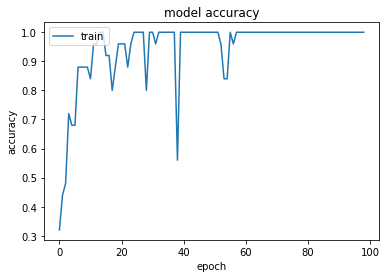

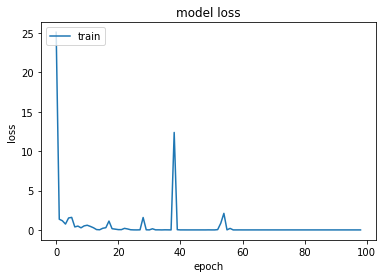

In [10]:
plt.plot(model_fit.history['accuracy'])
#plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
#plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
scores = model.evaluate(train_dataset, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 100.00%


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [13]:
# save model and architecture to single file
model.save("advancedModel1.h5")

In [14]:
model.save_weights("advancedModel_weights1.h5")